In [10]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import random


 # 1 Markowitz et frontière efficiente en théorie

In [70]:
# Fonction pour lire le fichier CSV et sélectionner des tickers aléatoires
def select_random_tickers(file_path, num_assets):
    data = pd.read_csv(file_path)
    selected_tickers = random.sample(list(data['Ticker']), num_assets)
    
    return selected_tickers

file_path = 'S&P 500 tickers.csv'  
num_assets = 30  # Nombre d'actifs à sélectionner

tickers_aleatoires = select_random_tickers(file_path, num_assets)


In [71]:
# Télécharger les données
data = yf.download(tickers_aleatoires, start="2004-01-01", end="2024-01-01")['Adj Close']


[*********************100%***********************]  30 of 30 completed


In [85]:
# Calculer les rendements journaliers
returns = data.pct_change().dropna()

# Estimer la moyenne et la matrice de covariance
mu = returns.mean().to_numpy()  # Vecteur moyenne des rendements
Sigma = returns.cov().to_numpy()  # Matrice de covariance


# Vecteur de 1 (pour la contrainte que la somme des poids est égale à 1)
e = np.ones(mu.shape)

# Inverser la matrice de covariance
Sigma_inv = np.linalg.inv(Sigma)



/tmp/ipykernel_169463/2961573285.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = data.pct_change().dropna()


In [86]:
# Fonction pour calculer les poids optimaux pour un lambda donné
def markowitz_weights(mu, Sigma_inv, e, lam):
    A = e.T @ Sigma_inv @ e
    B = e.T @ Sigma_inv @ mu
    C = mu.T @ Sigma_inv @ mu
    
    w_star = Sigma_inv @ e / A + 1 / lam * (Sigma_inv @ mu - Sigma_inv @ e * B / A)
    return w_star


In [87]:
# Tracer la frontière efficiente
lambdas = np.logspace(0,6, 100)
portfolios = [markowitz_weights(mu, Sigma_inv, e, lam) for lam in lambdas]

# Calculer les espérances et les risques des portefeuilles
expected_returns = [w.T @ mu for w in portfolios]
risks = [np.sqrt(w.T @ Sigma @ w) for w in portfolios]



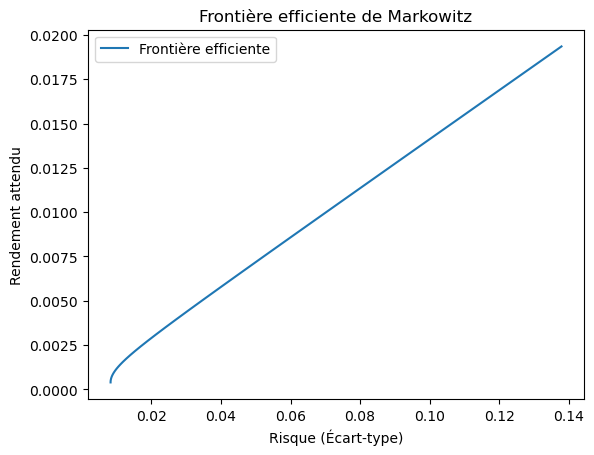

In [88]:
# Tracer la frontière efficiente
plt.plot(risks, expected_returns, label='Frontière efficiente')
plt.xlabel('Risque (Écart-type)')
plt.ylabel('Rendement attendu')
plt.title('Frontière efficiente de Markowitz')
plt.legend()
plt.show()

In [89]:
# Fonction pour calculer le rendement et le risque d'un portefeuille
def portfolio_performance(weights, mean_returns, cov_matrix):
    portfolio_return = np.dot(weights, mean_returns)
    portfolio_variance = np.dot(weights.T, np.dot(cov_matrix, weights))
    portfolio_std_dev = np.sqrt(portfolio_variance)
    return portfolio_return, portfolio_std_dev

# Fonction pour tracer la frontière efficiente
def plot_efficient_frontier(mean_returns, cov_matrix, num_portfolios=10000):
    results = np.zeros((3, num_portfolios))
    
    for i in range(num_portfolios):
        weights = np.random.dirichlet(np.ones(len(mean_returns)))
        portfolio_return, portfolio_std_dev = portfolio_performance(weights, mean_returns, cov_matrix)
        results[0,i] = portfolio_return
        results[1,i] = portfolio_std_dev
        results[2,i] = results[0,i] / results[1,i]  # Ratio de Sharpe

    return results


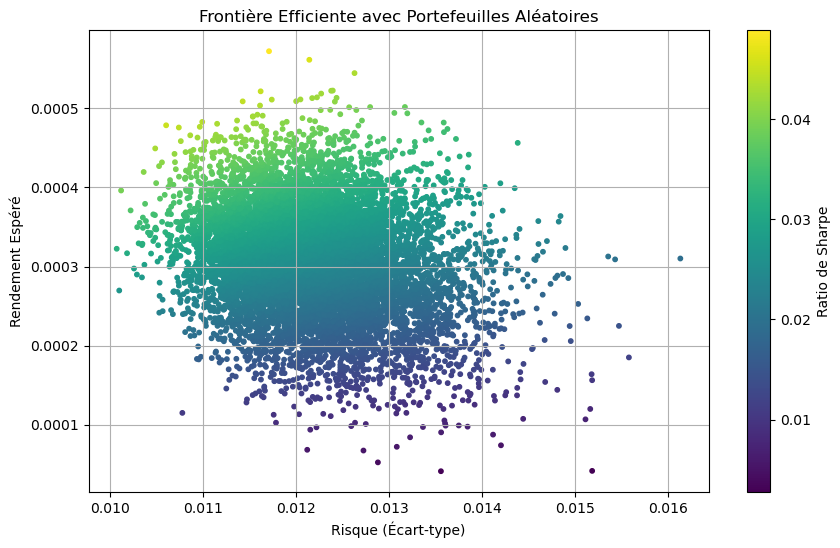

In [90]:

# Tracer la frontière efficiente
results = plot_efficient_frontier(mu, Sigma, num_portfolios)

# Tracer les résultats
plt.figure(figsize=(10, 6))
plt.scatter(results[1,:], results[0,:], c=results[2,:], cmap='viridis', marker='o', s=10)
plt.title('Frontière Efficiente avec Portefeuilles Aléatoires')
plt.xlabel('Risque (Écart-type)')
plt.ylabel('Rendement Espéré')
plt.colorbar(label='Ratio de Sharpe')
plt.grid()
plt.show()


# 2 Markowitz et frontière efficiente en pratique